In [309]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1: Data analysis and preprocessing

## 1.Find variables

In [310]:
DS= pd.read_csv('data_salaries.csv')
DS.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


The dataset above are the first 10 people of the dataset. A instance would be the each person on each row. The features in this case would be variables of 'work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', and 'company size'.

In [311]:
DS.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


The dataset contains data from 2020 to 2023 and the mean and interquatile range of the 'work_year' suggests that most instances are from 2022 to 2023. Average salary in usd is 137570. The mean value for remote_ratio is about 46% which suggests a split between remote and on-site work.

In [312]:
pd.reset_option('display.max_colwidth')
group_names = DS.apply(lambda x: x.unique())
print(group_names)

work_year                                      [2023, 2022, 2020, 2021]
experience_level                                       [SE, MI, EN, EX]
employment_type                                        [FT, CT, FL, PT]
job_title             [Principal Data Scientist, ML Engineer, Data S...
salary                [80000, 30000, 25500, 175000, 120000, 222200, ...
salary_currency       [EUR, USD, INR, HKD, CHF, GBP, AUD, SGD, CAD, ...
salary_in_usd         [85847, 30000, 25500, 175000, 120000, 222200, ...
employee_residence    [ES, US, CA, DE, GB, NG, IN, HK, PT, NL, CH, C...
remote_ratio                                               [100, 0, 50]
company_location      [ES, US, CA, DE, GB, NG, IN, HK, NL, CH, CF, F...
company_size                                                  [L, S, M]
dtype: object


In [313]:
DS.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

work_year, salary, salary_in_usd, remote_ratio are continuous numerical data

experience_level, employment_type, job_title, salary_currency, employee_residence, company_location, company_size are categorical data

## 2. Visualisation

The mean of Salary in US dollar is: 137570.39
The standard deviation of Salary in US dollar is: 63055.63


/var/folders/ss/lhfdcc6970n4trfqr1hb_sz80000gp/T/ipykernel_35681/1312524493.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


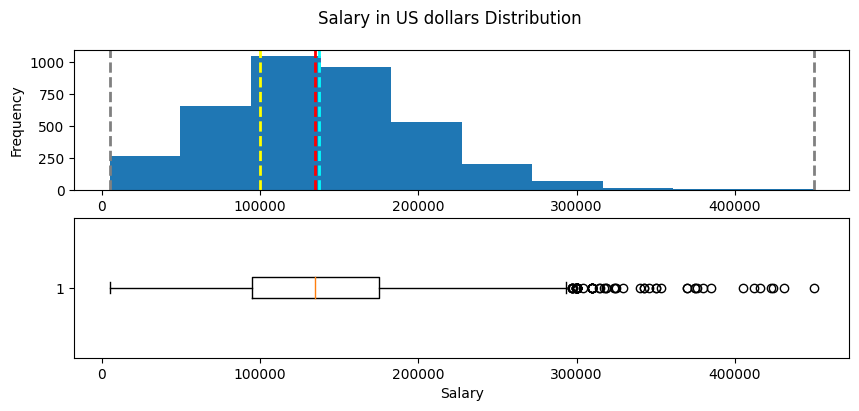

In [314]:
salary=DS['salary_in_usd']
min_salary = salary.min()
max_salary = salary.max()
med_salary = salary.median()
mod_salary = salary.mode()[0]
mean_salary=DS['salary_in_usd'].mean()
std_salary=DS['salary_in_usd'].std()

fig, ax=plt.subplots(2,1,figsize=(10,4))
ax[0].hist(salary)
ax[0].axvline(x=min_salary, color = 'gray', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mean_salary, color = 'cyan', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=med_salary, color = 'red', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=mod_salary, color = 'yellow', linestyle='dashed', linewidth = 2)
ax[0].axvline(x=max_salary, color = 'gray', linestyle='dashed', linewidth = 2)


ax[0].set_xlabel('salary')
ax[0].set_ylabel('Frequency')

ax[1].boxplot(salary, vert=False)
ax[1].set_xlabel('Salary')
fig.suptitle('Salary in US dollars Distribution')

fig.show()



print(f"The mean of Salary in US dollar is: {mean_salary:.2f}")
print(f"The standard deviation of Salary in US dollar is: {std_salary:.2f}")


work_year
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
Name: salary_in_usd, dtype: float64
experience_level
EN     78546.284375
EX    194930.929825
MI    104525.939130
SE    153051.071542
Name: salary_in_usd, dtype: float64
employment_type
CT    113446.900000
FL     51807.800000
FT    138314.199570
PT     39533.705882
Name: salary_in_usd, dtype: float64
remote_ratio
0      144316.202288
50      78400.687831
100    136481.452830
Name: salary_in_usd, dtype: float64
remote_ratio
0      144316.202288
50      78400.687831
100    136481.452830
Name: salary_in_usd, dtype: float64


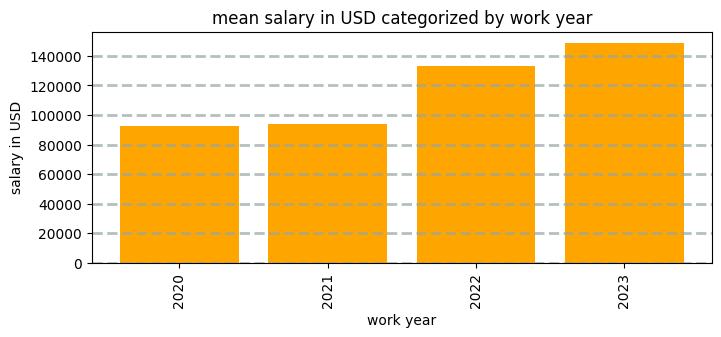

([0, 1, 2], [Text(0, 0, 'L'), Text(1, 0, 'S'), Text(2, 0, 'M')])

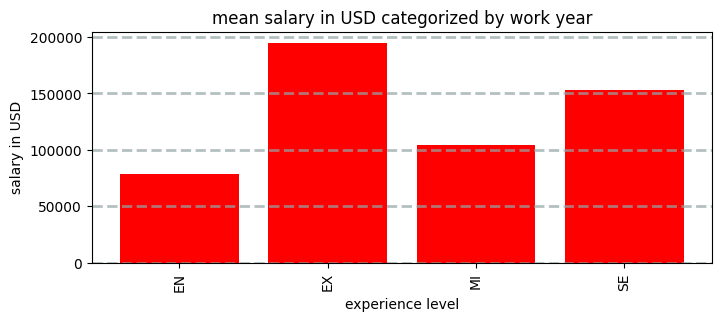

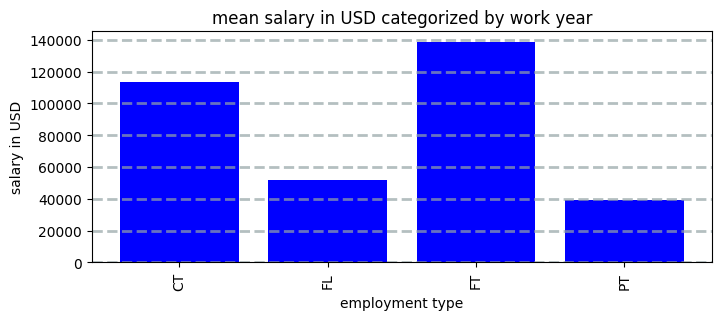

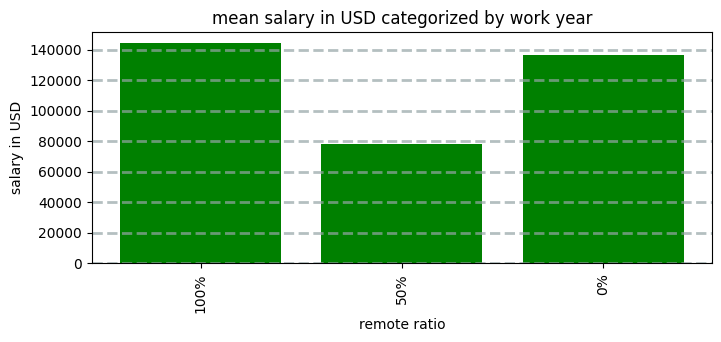

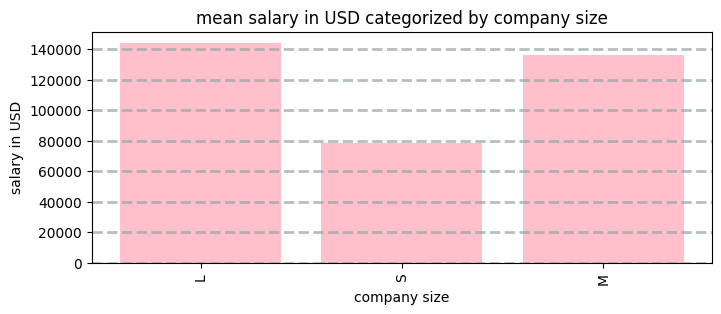

In [315]:

Salaries_by_WY = DS.groupby(['work_year'])['salary_in_usd'].mean()
Salaries_by_EL = DS.groupby(['experience_level'])['salary_in_usd'].mean()
Salaries_by_ET = DS.groupby(['employment_type'])['salary_in_usd'].mean()
Salaries_by_RR = DS.groupby(['remote_ratio'])['salary_in_usd'].mean()
Salaries_by_CS= DS.groupby(['remote_ratio'])['salary_in_usd'].mean()

print(Salaries_by_WY)
print(Salaries_by_EL)
print(Salaries_by_ET)
print(Salaries_by_RR)
print(Salaries_by_CS)

fig = plt.figure(figsize=(8,3))
plt.bar(x=['2020','2021','2022','2023'], height=Salaries_by_WY, color='orange')
plt.title('mean salary in USD categorized by work year')
plt.xlabel('work year')
plt.ylabel('salary in USD')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

plt.show()

fig = plt.figure(figsize=(8,3))
plt.bar(x=['EN','EX','MI','SE'], height=Salaries_by_EL, color='red')
plt.title('mean salary in USD categorized by work year')
plt.xlabel('experience level')
plt.ylabel('salary in USD')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

fig = plt.figure(figsize=(8,3))
plt.bar(x=['CT','FL','FT','PT'], height=Salaries_by_ET, color='blue')
plt.title('mean salary in USD categorized by work year')
plt.xlabel('employment type')
plt.ylabel('salary in USD')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

fig = plt.figure(figsize=(8,3))
plt.bar(x=['100%','50%','0%'], height=Salaries_by_RR, color='green')
plt.title('mean salary in USD categorized by work year')
plt.xlabel('remote ratio')
plt.ylabel('salary in USD')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

fig = plt.figure(figsize=(8,3))
plt.bar(x=['L','S','M'], height=Salaries_by_RR, color='pink')
plt.title('mean salary in USD categorized by company size')
plt.xlabel('company size')
plt.ylabel('salary in USD')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

The association between company size, remote ratio and salary in USD isn't there. The higher the experience level and employment type will increase the salary in USD. Further the work year also would seem to increase the salary in USD. 

## 3. Data cleaning

In [316]:
missing_data = DS.isna().sum().to_frame()
print(missing_data)

                    0
work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
employee_residence  0
remote_ratio        0
company_location    0
company_size        0


In [317]:
DF=pd.DataFrame(DS)
q1 = DF['salary_in_usd'].quantile(0.25)
q3 = DF['salary_in_usd'].quantile(0.75)

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers = DF[(DF['salary_in_usd'] < lower_bound) | (DF['salary_in_usd'] > upper_bound)]

outlier_distributions = {}
for column in ['experience_level', 'employment_type', 'company_size', 'job_title']:
    outlier_distributions[column] = outliers[column].value_counts()

outlier_distributions



{'experience_level': experience_level
 SE    43
 EX    14
 MI     5
 EN     1
 Name: count, dtype: int64,
 'employment_type': employment_type
 FT    62
 CT     1
 Name: count, dtype: int64,
 'company_size': company_size
 M    50
 L    12
 S     1
 Name: count, dtype: int64,
 'job_title': job_title
 Data Engineer                         16
 Data Scientist                        10
 Data Science Manager                   7
 Machine Learning Engineer              6
 Research Scientist                     4
 Applied Scientist                      3
 Director of Data Science               2
 Data Architect                         2
 Data Analyst                           2
 Head of Data Science                   1
 Principal Data Scientist               1
 Applied Data Scientist                 1
 Data Analytics Lead                    1
 Data Science Tech Lead                 1
 Computer Vision Engineer               1
 Machine Learning Software Engineer     1
 AI Scientist                

The outliers have shown positive association with experience level and employment type but not in company size. These outliers are realistic outcomes as their job title reflects the required technical quality and experience they needed for their job and thus more money.

In [318]:
DF_new= DF.drop(['salary', 'salary_currency', 'employee_residence', 'company_location'], axis=1)
DF_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3755 non-null   int64 
 1   experience_level  3755 non-null   object
 2   employment_type   3755 non-null   object
 3   salary_in_usd     3755 non-null   int64 
 4   remote_ratio      3755 non-null   int64 
 5   company_size      3755 non-null   object
dtypes: int64(3), object(3)
memory usage: 176.1+ KB


Salary and salarry currency variables can easily be represented in the salary in USD variable. Job title variable, employee residence, and company location consists too many categories. With the large number of sub-groups it can lead to complexity on interpreting relationships.

In [388]:
Count_WY=DF_new['work_year'].value_counts()
Count_EL=DF_new['experience_level'].value_counts()
Count_ET=DF_new['employment_type'].value_counts()
Count_RR=DF_new['remote_ratio'].value_counts()
Count_CS=DF_new['company_size'].value_counts()

print(Count_WY, Count_EL, Count_ET, Count_RR, Count_CS)

work_year
 0.905994    1785
-0.540438    1664
-1.986870     230
-3.433303      76
Name: count, dtype: int64 experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64 employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64 remote_ratio
-0.952433    1923
 1.105918    1643
 0.076743     189
Name: count, dtype: int64 company_size
M    3153
L     454
S     148
Name: count, dtype: int64


Most of the data are unbalanced. The data is heavily skewed towards SE, FT, 0 or 100, medium, in respectively experience level, employment type, remote ratio, and company size variables. However, considering these imbalances reflect the reality of the dataset which shouldn't be the problem. 

In [390]:
WY_OHE=DS["work_year"].array.reshape(-1,1)
EL_OHE=DS["experience_level"].array.reshape(-1,1)
ET_OHE=DS["employment_type"].array.reshape(-1,1)
RR_OHE=DS["remote_ratio"].array.reshape(-1,1)
CS_OHE=DS["company_size"].array.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded_WY=encoder.fit_transform(WY_OHE).toarray()
encoded_EL=encoder.fit_transform(EL_OHE).toarray()
encoded_ET=encoder.fit_transform(ET_OHE).toarray()
encoded_RR=encoder.fit_transform(RR_OHE).toarray()
encoded_CS=encoder.fit_transform(CS_OHE).toarray()


def encode_feature(feature, name):
   
    feature = feature.reshape(-1, 1)
    encoder = OneHotEncoder(sparse_output=False)
    encoded_feature = encoder.fit_transform(feature)
    categories = encoder.categories_[0]
    feature_names = [f"{name}_{category}" for category in categories]
    
    return encoded_feature, feature_names


encoded_WY, WY_names = encode_feature(DF_new["work_year"].to_numpy(), 'work_year')
encoded_EL, EL_names = encode_feature(DF_new["experience_level"].to_numpy(), 'experience_level')
encoded_ET, ET_names = encode_feature(DF_new["employment_type"].to_numpy(), 'employment_type')
encoded_RR, RR_names = encode_feature(DF_new["remote_ratio"].to_numpy(), 'remote_ratio')
encoded_CS, CS_names = encode_feature(DF_new["company_size"].to_numpy(), 'company_size')


encoded_EL_df = pd.DataFrame(encoded_EL, columns=EL_names)
encoded_ET_df = pd.DataFrame(encoded_ET, columns=ET_names)
encoded_CS_df = pd.DataFrame(encoded_CS, columns=CS_names)



This one-hot encoding is for further training usage. Categorical data needs to be transferred to numerical input and output for further machine learning algofithms.

## 4. Correlated variables

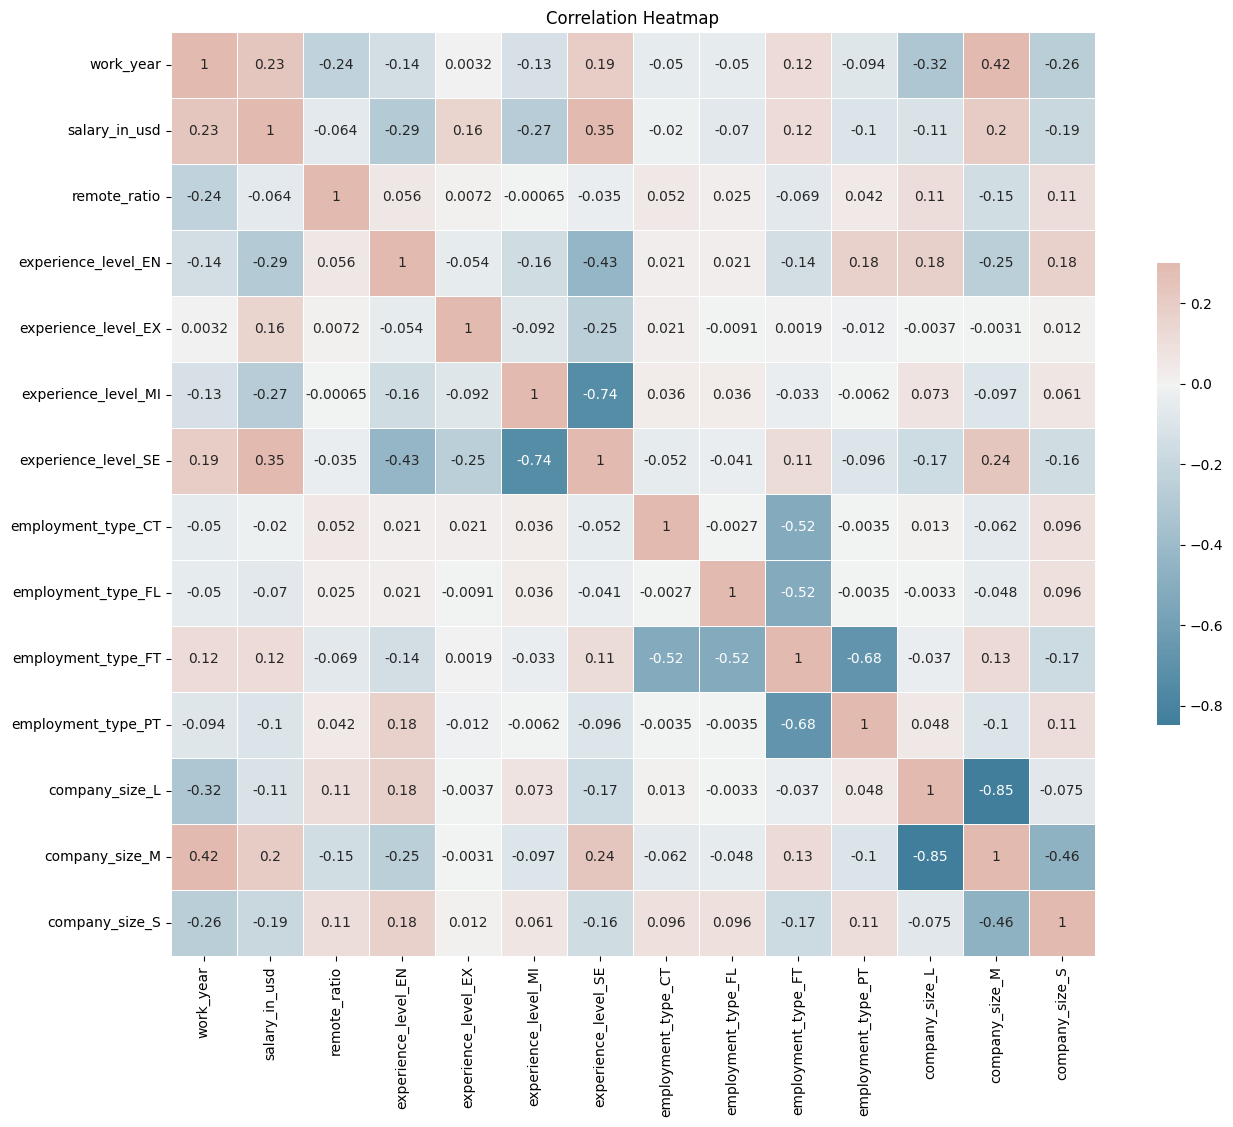

In [381]:
DF_encoded = pd.concat([DF_new, encoded_EL_df, encoded_ET_df, encoded_CS_df], axis=1)
selected_cols = ['work_year', 'salary_in_usd', 'remote_ratio'] + EL_names + ET_names + CS_names
corr = DF_encoded[selected_cols].corr()
plt.figure(figsize=(16, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

Work_year has slight positive correlation with salary_in_USD which suggests salary tend to increase with increasing years of work. Remote ratio has a slight negative correlation with salary_in_USD. Salary_in_USD has positive correlation in full time group while other groups in employment type has negative correlation. In experience level, overall higher levels of experience correlates with higher salaries. The company size doesn't show much correlation. 

## 5. summary

We started by loading the dataset and the first few rows to understand features in the dataset. We use salary_in_usd as our target variable. We use the IQR method to detect outliers but we keep them as they seem to be realistic outcome that associates with higher experience level. We use box and whisker plots to understand the distribution and correlation heatmap to see any feature importance. The correlation heatmap reveals that experience_level and employment types affect the salary in USD. Categorical data was treated with one-hot encoding for further training and evaluation on prediction models.

# Part 2: Training and Evaluation

## 1. load and split preprocessed

In [322]:
DF_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3755 non-null   int64 
 1   experience_level  3755 non-null   object
 2   employment_type   3755 non-null   object
 3   salary_in_usd     3755 non-null   int64 
 4   remote_ratio      3755 non-null   int64 
 5   company_size      3755 non-null   object
dtypes: int64(3), object(3)
memory usage: 176.1+ KB


work_year is the continuous numerical variable which indicates the year the instance working in.

experience_level is the categorical variable which express the experience of that instance was in with either entry-level "en", mid-level "ML", and execuetive level "EX". 

emplyoment_type is the categorical variable which express the work type they are in. "FT", "PT", "CT", "FL" respectively refers to full time, part time, contract, freelance. 

salary_in_usd is the continuous numerical variable which identifies the salary instances are earning in that year in US dollars.

remote_ratio refers to the proportion of time working in remote area.

company size refers to the size of the company of that instance is working. 

The target variable here is salary_in_usd.


# 2: Choosing algatithms

We have chosen linear regression, decision tree, and random forest. Linear regression assumes a linear relationship between dependent and independent variables to find a line that best fits the data points. It is a supervised learning that consists of making decisions and being corrected by actual outputs whenever it's wrong. Decision tree is another supervised learning algorithm but this time the dataset is split according to parameter creating a branch of a tree for each split. Data becomes into leaf nodes that final prediction is made. This is suitable for handling both numerical and cateegorical data. Random forest is a ensemble method that contains multiple decision tree and average of all prediction trees give final prediction model. It can achieve better performance and reduces possible overfitting comapred to single decision tree.

# 3,4: Running, training, and evaluation of algorithms

In [355]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

df_final = pd.concat([encoded_EL_df, encoded_ET_df, encoded_CS_df, DF_new[['work_year', 'salary_in_usd']]], axis=1)

X = df_final.drop('salary_in_usd', axis=1)
y = df_final['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

lr_r2 = r2_score(y_test, lr_predictions)
lr_mae= mean_absolute_error(y_test, lr_predictions)
lr_mse= mean_squared_error(y_test, lr_predictions, squared=False)
lr_r2, lr_mae, lr_mse

(0.22367326433916734, 44039.275953859804, 57383.08004171305)

In [357]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=101)
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

dt_r2 = r2_score(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)

dt_r2, dt_mae, dt_rmse


(0.23088404521519434, 43928.16031191513, 57115.9617591731)

In [391]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

rf_r2, rf_mae, rf_rmse

(0.2312561165381708, 43898.55947051671, 57102.14473841561)

# 5. summary
In overall random forest has the best R-square value comapred to decision tree and linear regression (0.2312>0.2309>0.2237). Random forest also has the lowest in mean absolute error and root mean squared error (43898<43928<44039) and (57115<57115<57383). R-square values represent how well predictions match the actual data. Mean absolute error represents the difference between actual outcomes and predictions that lower the value better it is. RMSE is the square root of averaged squared difference between actual outcomes and predictions made by the model.